<a href="https://colab.research.google.com/github/CVH4OYC/ML_lab/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Набор данных по температуре инфракрасной термографии содержит температуры, считанные из различных мест предполагаемых изображений пациентов, с добавлением оральных температур, измеренных для каждого человека. 33 признака включают пол, возраст, этническую принадлежность, температуру окружающей среды, влажность, расстояние и другие показания температуры с тепловых изображений. Набор данных предназначен для использования в задаче регрессии для прогнозирования оральной температуры с использованием информации об окружающей среде, а также показаний тепловых изображений.

Метками классов для задачи регрессии являются либо температура во рту, измеренная в быстром режиме (aveOralF), либо температура, измеренная в режиме мониторинга (aveOralM).

Загрузка датасета и вывод информации о нём

In [1]:
import numpy as np
import pandas as pd

In [3]:
pip install ucimlrepo

In [63]:
from ucimlrepo import fetch_ucirepo


infrared_thermography_temperature = fetch_ucirepo(id=925)
# Извлекаем признаки и целевые переменные
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# Объединяем X и y
df = pd.concat([X, y], axis=1)

# Выводим шапку объединенного датасета
df.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04


In [5]:
df.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,36.979216,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.386403,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.750000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.800000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.900000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.100000,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,39.600000,40.340000


Информация о категориальных признаках

In [6]:
df.describe(include=['O'])

,Gender,Age,Ethnicity
count,1020,1020,1020
unique,2,8,6
top,Female,18-20,White
freq,606,534,506


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [7]:
df.isnull().sum()

,0
Gender,0
Age,0
Ethnicity,0
T_atm,0
Humidity,0
Distance,2
T_offset1,0
Max1R13_1,0
Max1L13_1,0
aveAllR13_1,0


Есть пропуски, поэтому заменяем их средним

In [64]:
df.Distance = df.Distance.fillna(df.Distance.median())
df.isnull().sum()

,0
Gender,0
Age,0
Ethnicity,0
T_atm,0
Humidity,0
Distance,0
T_offset1,0
Max1R13_1,0
Max1L13_1,0
aveAllR13_1,0


Функция для вывода метрик

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [36]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

Кодирование категориальных переменных

In [65]:
from sklearn.preprocessing import OrdinalEncoder
# Кодируем категориальные переменные с помощью OrdinalEncoder
encoder = OrdinalEncoder()
df[['Gender', 'Age', 'Ethnicity']] = encoder.fit_transform(df[['Gender', 'Age', 'Ethnicity']])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   float64
 1   Age          1020 non-null   float64
 2   Ethnicity    1020 non-null   float64
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1020 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

Матрица корреляции

<Axes: >

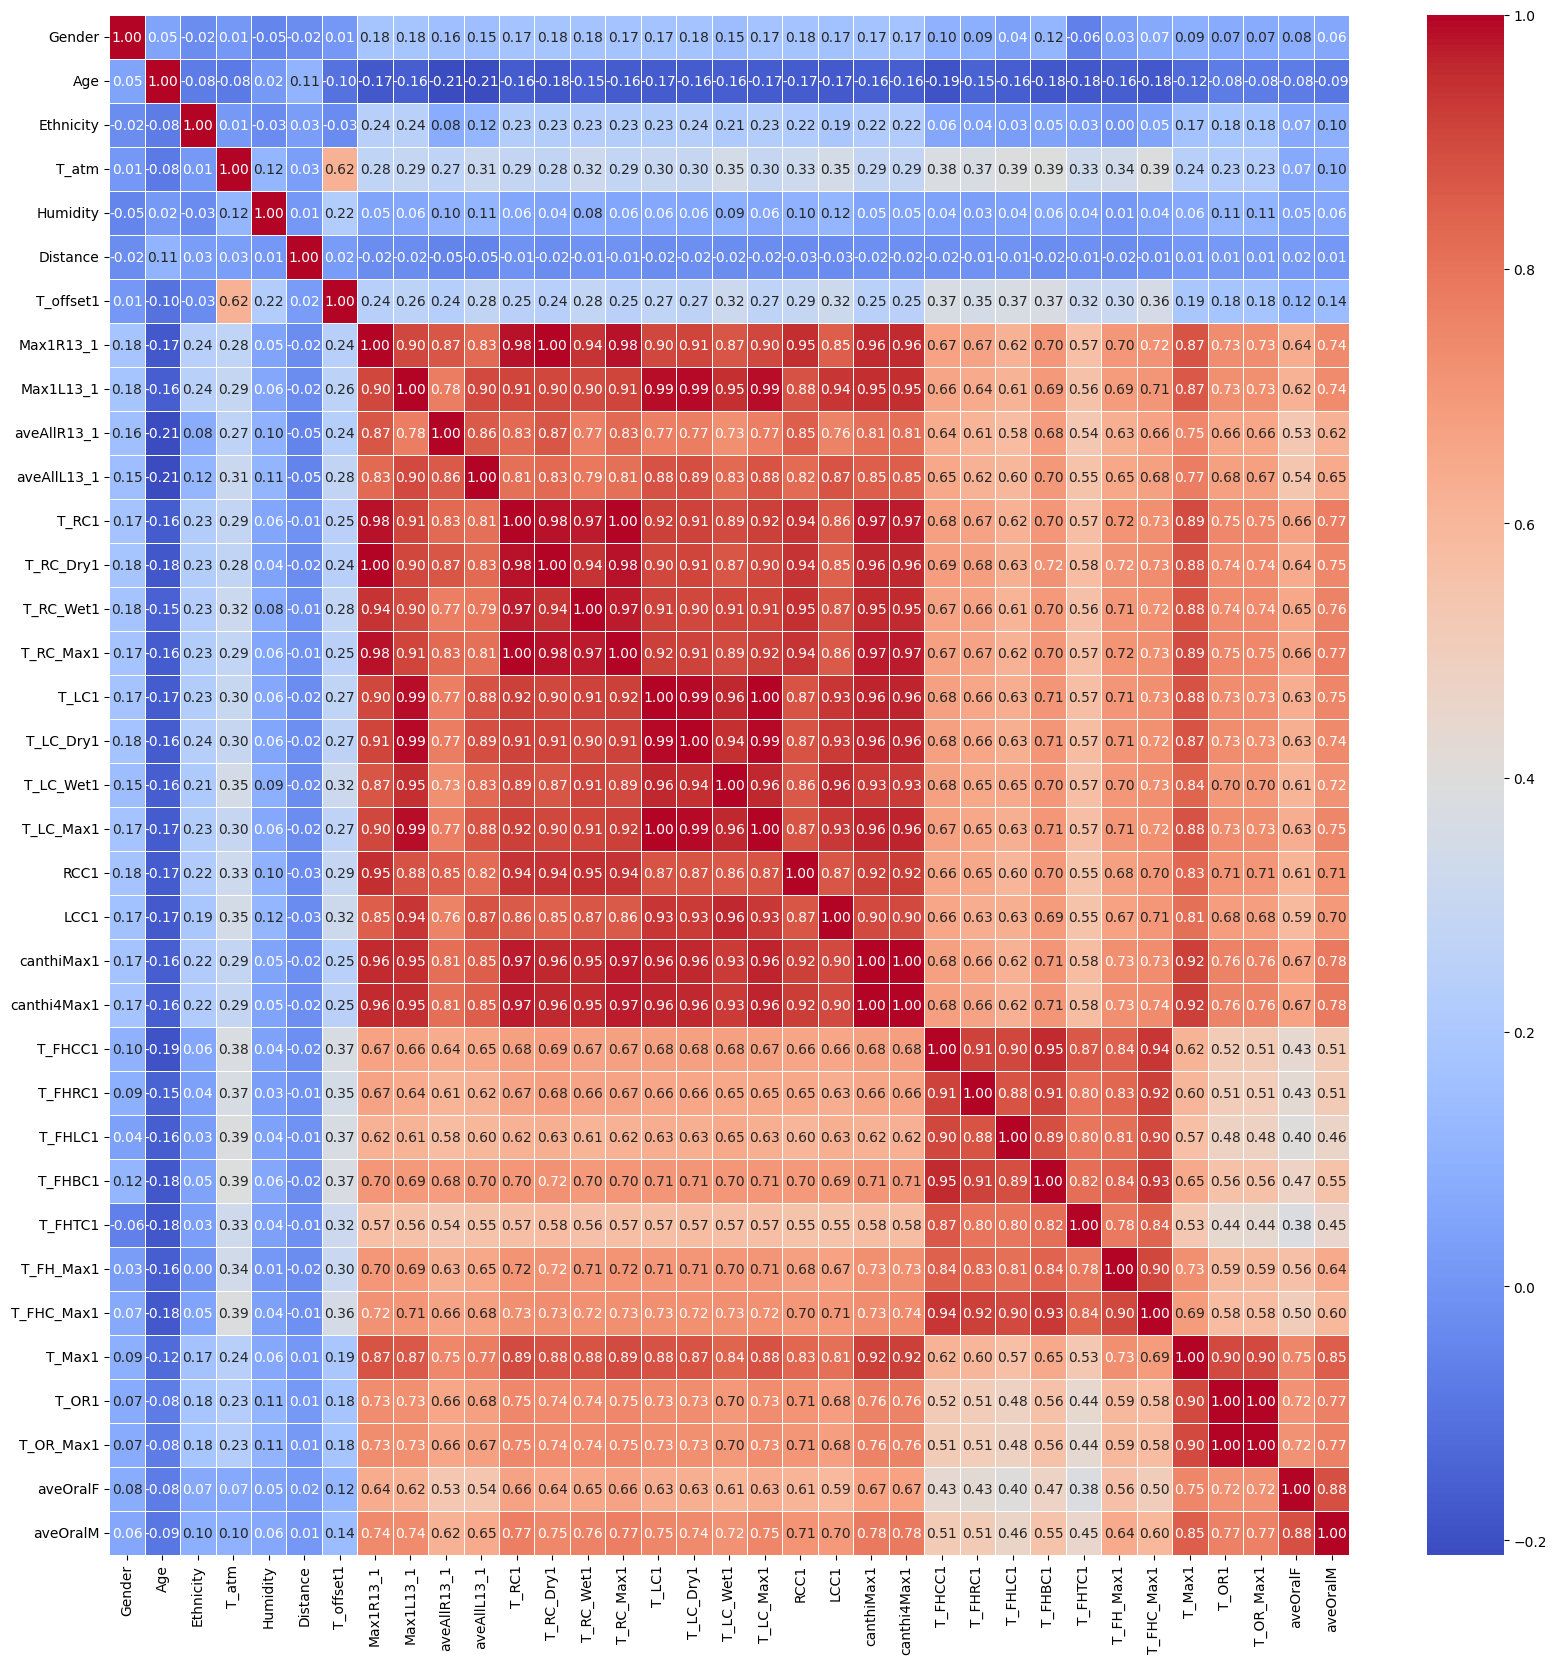

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [66]:
from sklearn.preprocessing import StandardScaler

# оставляем только одну целевую
X = df.drop(['aveOralF','aveOralM'], axis=1)
y = df['aveOralM']

print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1020, 33) | y shape: (1020,) 


# Линейная регрессия

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

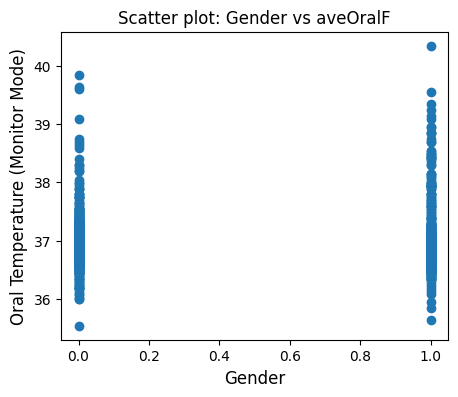

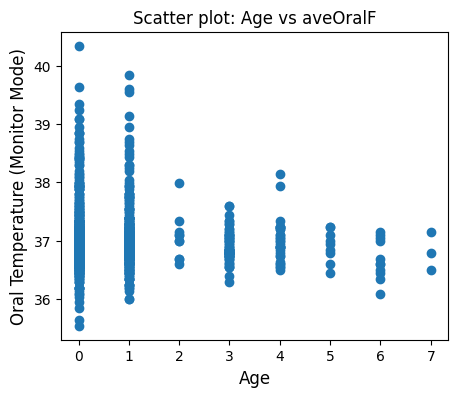

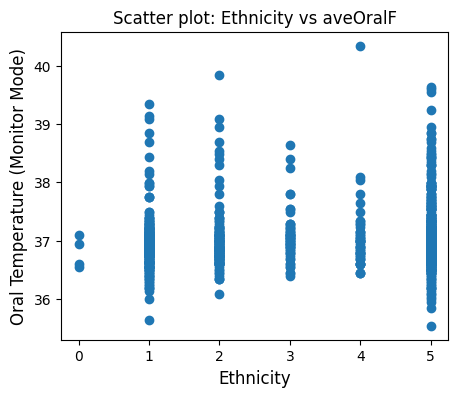

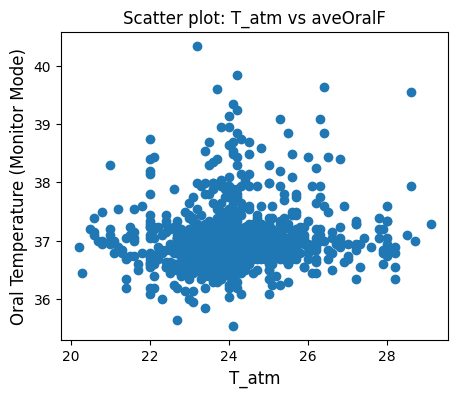

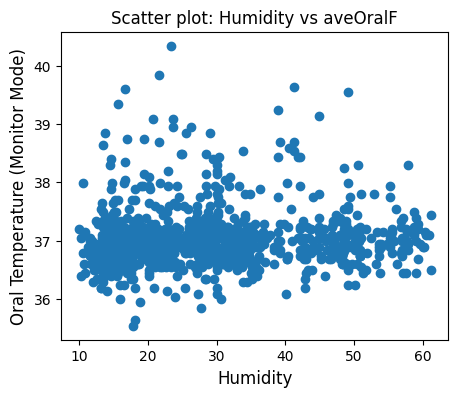

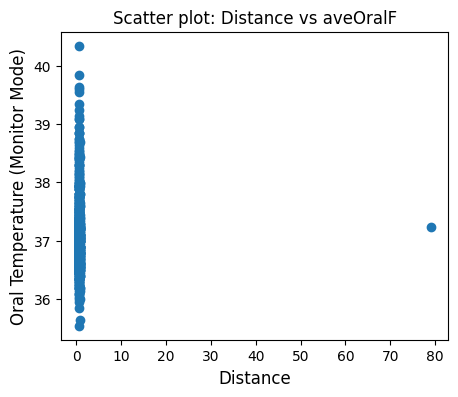

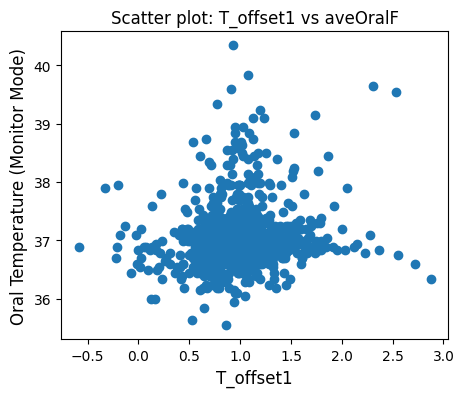

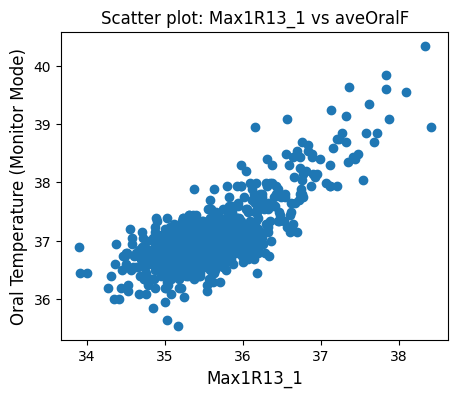

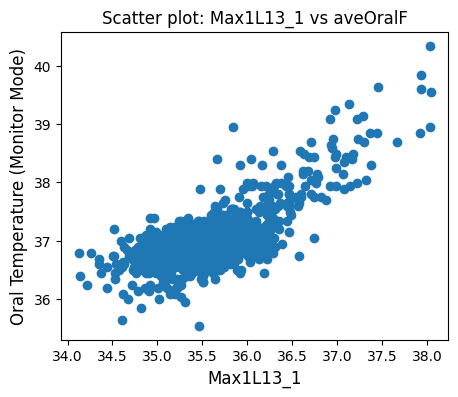

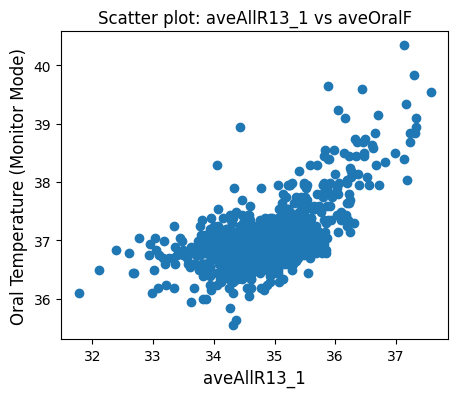

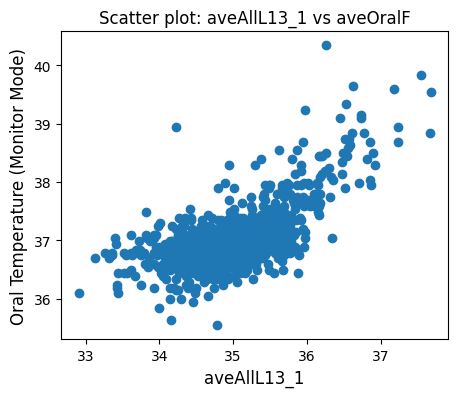

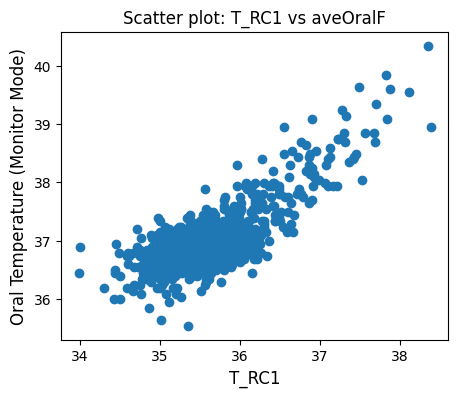

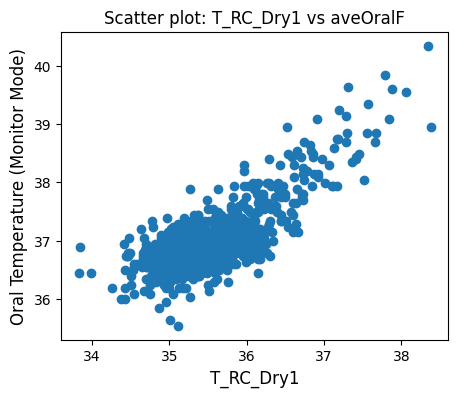

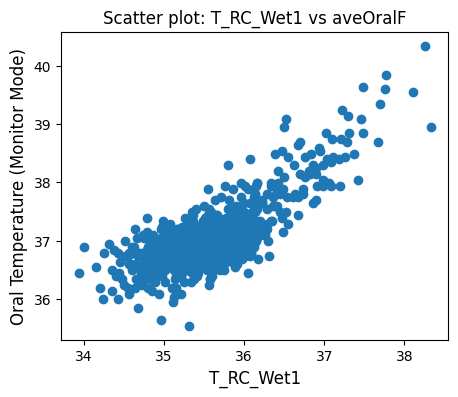

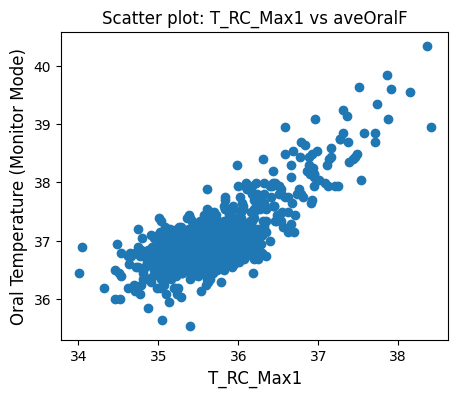

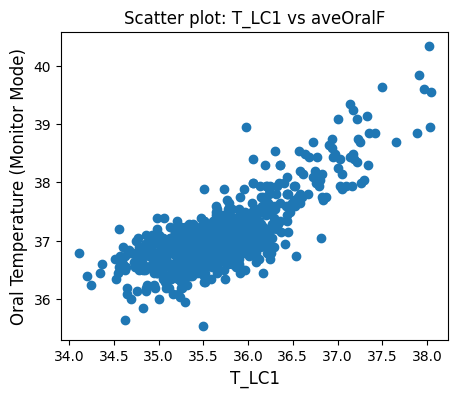

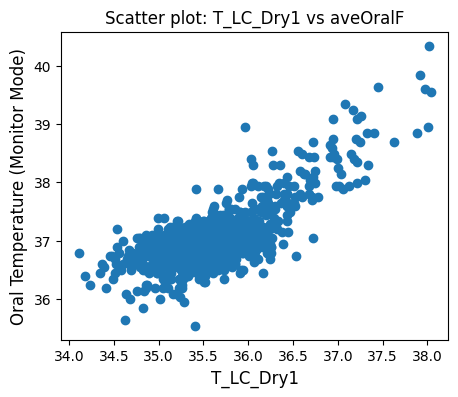

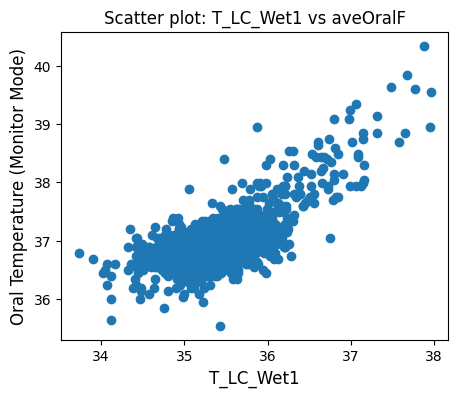

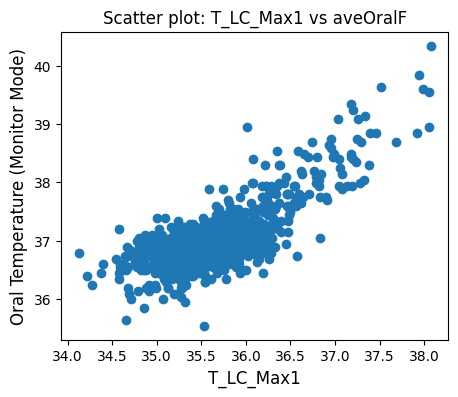

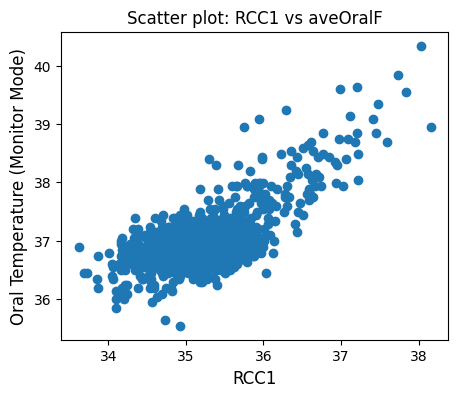

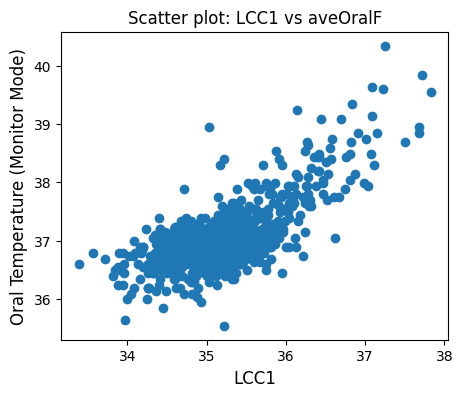

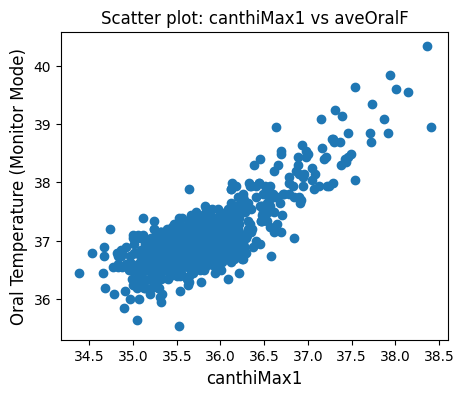

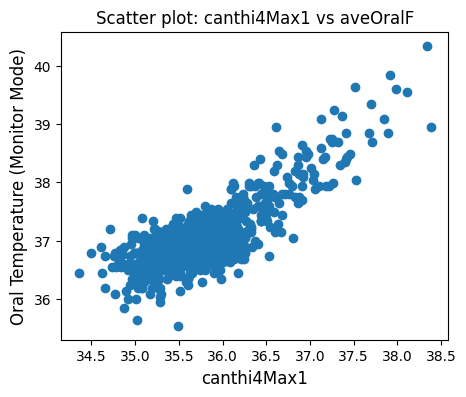

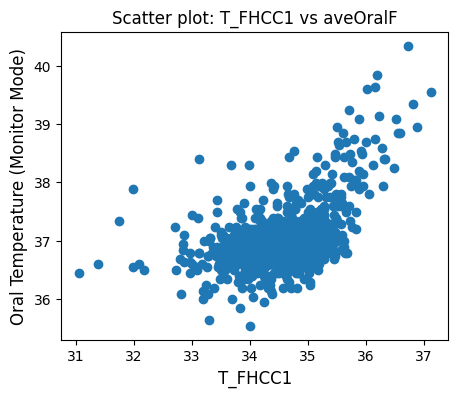

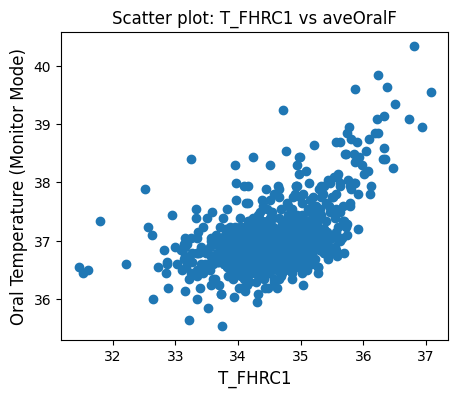

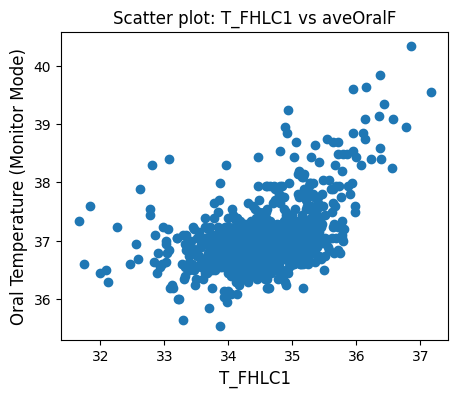

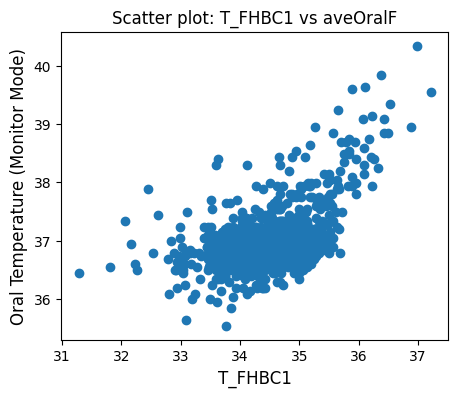

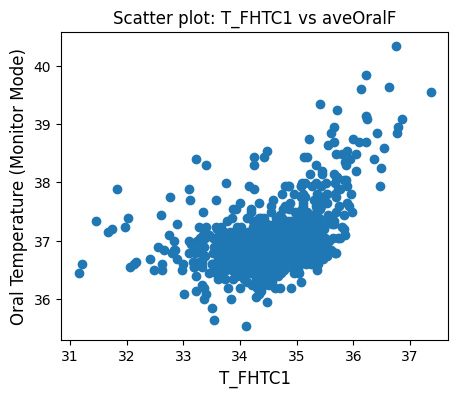

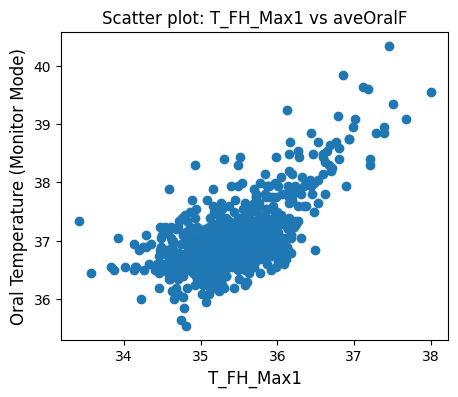

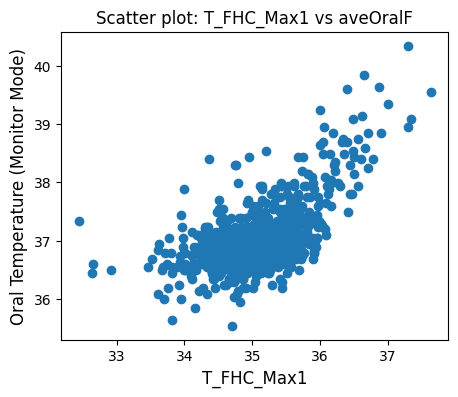

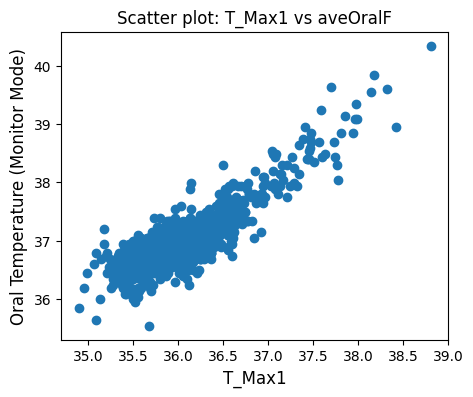

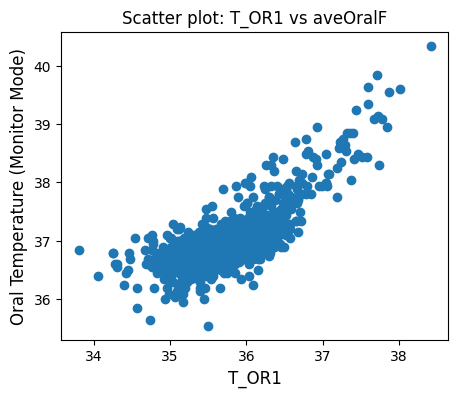

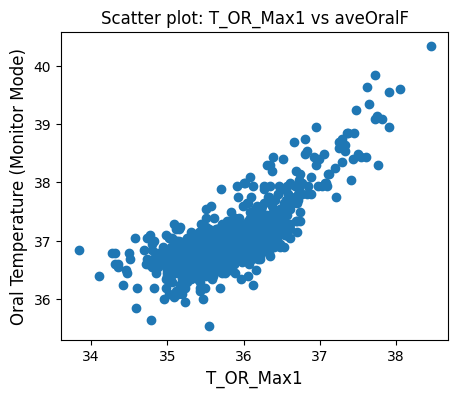

In [41]:

# Пробежимся по каждому признаку и построим графики рассеяния
for feature_name in X.columns:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[feature_name], y)
    plt.ylabel('Oral Temperature (Monitor Mode)', size=12)
    plt.xlabel(feature_name, size=12)
    plt.title(f'Scatter plot: {feature_name} vs aveOralF')
    plt.show()


Нормализация данных

In [67]:
# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Преобразуем обратно в DataFrame, чтобы сохранить имена столбцов
X = pd.DataFrame(X_scaled, columns=X.columns)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [70]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [71]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.2549
  R2: 0.6741
 Adjusted R2: 0.6109
 Cross Validated R2: 0.6337


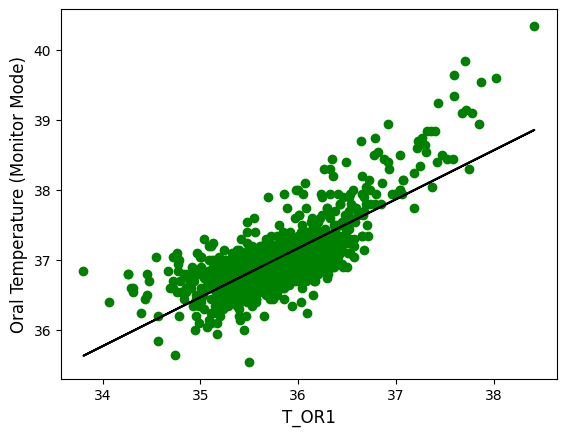

In [72]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df['T_OR1'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['aveOralM'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Oral Temperature (Monitor Mode)', size=12)
plt.xlabel('T_OR1', size=12)
plt.show()

# Полиномиальная регрессия

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [48]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  0.8395
  R2: -1.5307
 Adjusted R2: 1.1129
 Cross Validated R2: -1.8578


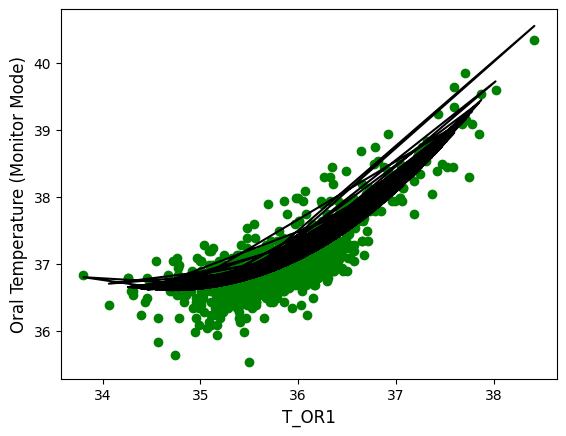

In [49]:
X2 = df['T_OR1'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['aveOralM'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Oral Temperature (Monitor Mode)', size=12)
plt.xlabel('T_OR1', size=12)
plt.show()

# Регрессия дерева принятия решений

In [73]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [74]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.3553
  R2: 0.3669
 Adjusted R2: 0.244
 Cross Validated R2: 0.541


# Регрессия случайного леса

In [85]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Create a stepwise regression model
modelRF = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

# Fit the model to the data
modelRF.fit(X_train_poly, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test_poly)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train_poly, y_train, X_test_poly, y_test, y_rf_pred)

RMSE:  0.1582
  R2: 0.8672
 Adjusted R2: 0.7437
 Cross Validated R2: 0.8537


Эта модель обладает лучшими метриками, чем остальные

# Регрессия опорных векторов (SVR)

In [75]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.2554
  R2: 0.6729
 Adjusted R2: 0.6094
 Cross Validated R2: 0.6761


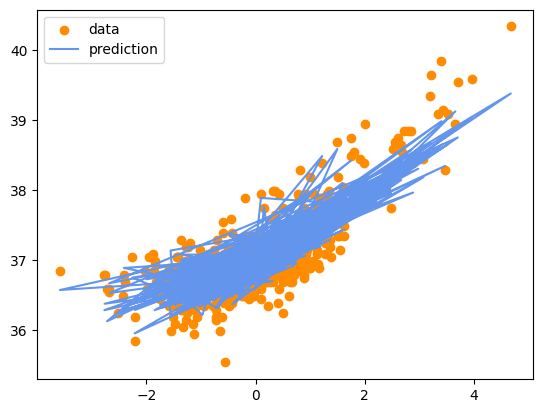

In [77]:
plt.scatter(X_train["T_OR1"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["T_OR1"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [78]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.3265
  R2: 0.4653
 Adjusted R2: 0.3615
 Cross Validated R2: 0.3975


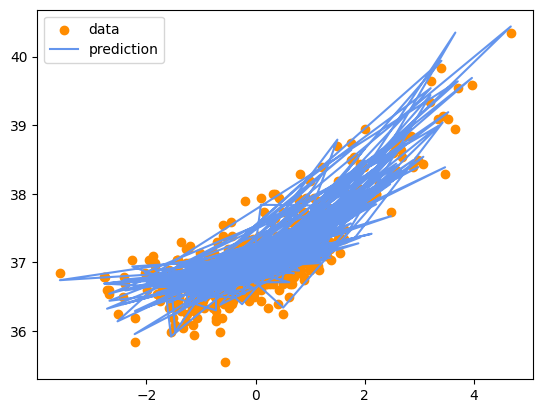

In [79]:
plt.scatter(X_train["T_OR1"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["T_OR1"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [80]:
# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.2529
  R2: 0.6793
 Adjusted R2: 0.6171
 Cross Validated R2: 0.7357


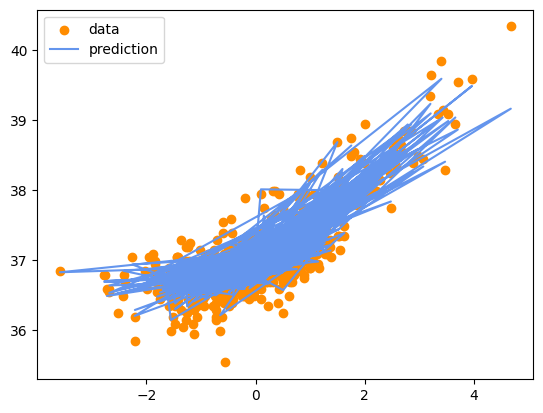

In [81]:
plt.scatter(X_train["T_OR1"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["T_OR1"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия ElasticNet

In [82]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.2637
  R2: 0.6514
 Adjusted R2: 0.5837
 Cross Validated R2: 0.6968


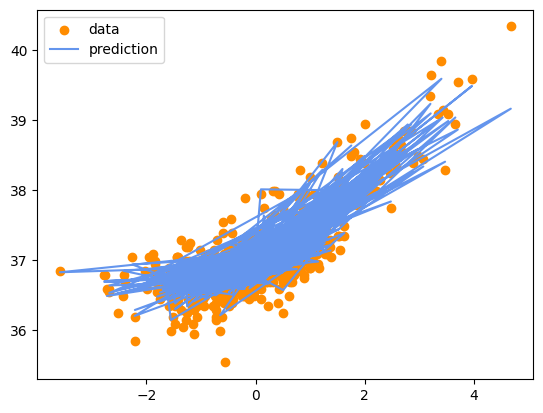

In [83]:
plt.scatter(X_train["T_OR1"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["T_OR1"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Выводы
Регрессия случайного леса показала наилучший R^2 среди всех моделей